In [ ]:
using DrWatson
@quickactivate "APLG"
include(srcdir("pdes.jl"));

using PyPlot, Roots

In [2]:
d4(x) = round(x; digits = 4);
F(x) = (1-x)*(ds(x) + dsp(x)*x)
Fp(x) = (1-x)*(2*dsp(x) + dspp(x)*x) - x*(ds(x) + dsp(x)*x)

pcrit(x) = (1-x)*( -Fp(x)/(-ds(x) + (1-x)*dsp(x)) )
G(x) = 2*(1+ds(x))*x/( ( ds(x)^2-F(x) )*pcrit(x) + x*F(x))
H(x) = 2 + (ds(x)*pcrit(x) + F(x) )*G(x)^2

pspin(x;Pe=10.0) = (-2-F(x)*Pe^2)/( ds(x)-dsp(x)*(1-x) )/Pe^2

ϕcrit(x;Pe = 10.0) = (-Fp(x)*Pe^2)/( ds(x)-dsp(x)*(1-x) )/Pe^2 -( dsp(x)-dspp(x)*(1-x)+dsp(x))*(-2-F(x)*Pe^2)/( ds(x)-dsp(x)*(1-x) )^2/Pe^2
ϕaccrit(x;Pe = 10.0) = ϕcrit(x;Pe =Pe)/(1-x) + pspin(x;Pe=Pe)/(1-x)^2

pspin_im(x;Pe=10.0) = ( 2*(1+ds(x))*x/Pe^2 + x*F(x) )/( F(x)- ds(x)^2)

function reimdiff(Pe; Δϕ = 0.001)
    ϕs = collect(Δϕ:Δϕ:(1-Δϕ))
    ϕp1s = pspin.(ϕs;Pe=Pe)
    ϕp2s = pspin_im.(ϕs;Pe=Pe)
    return minimum(ϕp1s.-ϕp2s)
end

function reimcritdiff(Pe; Δϕ = 0.001)
    ϕ = find_zero(x->(pspin.(x;Pe=Pe)/(1-x) - pspin.(x+1e-10;Pe=Pe)/(1-x-1e-10))/1e-10,(0.6,0.99))
    ϕp1 = pspin(ϕ;Pe=Pe)
    ϕp2 = pspin_im(ϕ;Pe=Pe)
    return ϕp1-ϕp2
end


reimcritdiff (generic function with 1 method)

In [3]:
function is_complex_pt(ϕa, ϕp; Pe = 10.)
    ϕ  = ϕa + ϕp
    ϕ0 = 1- ϕ
    expr2 = (β(ϕa, ϕp) + α(ϕa, ϕp)*Pe^2)
    return (expr2^2 - 4*ϕp*β(ϕa, ϕp)*ds(ϕ)^2*Pe^2)
end

is_complex_pt (generic function with 1 method)

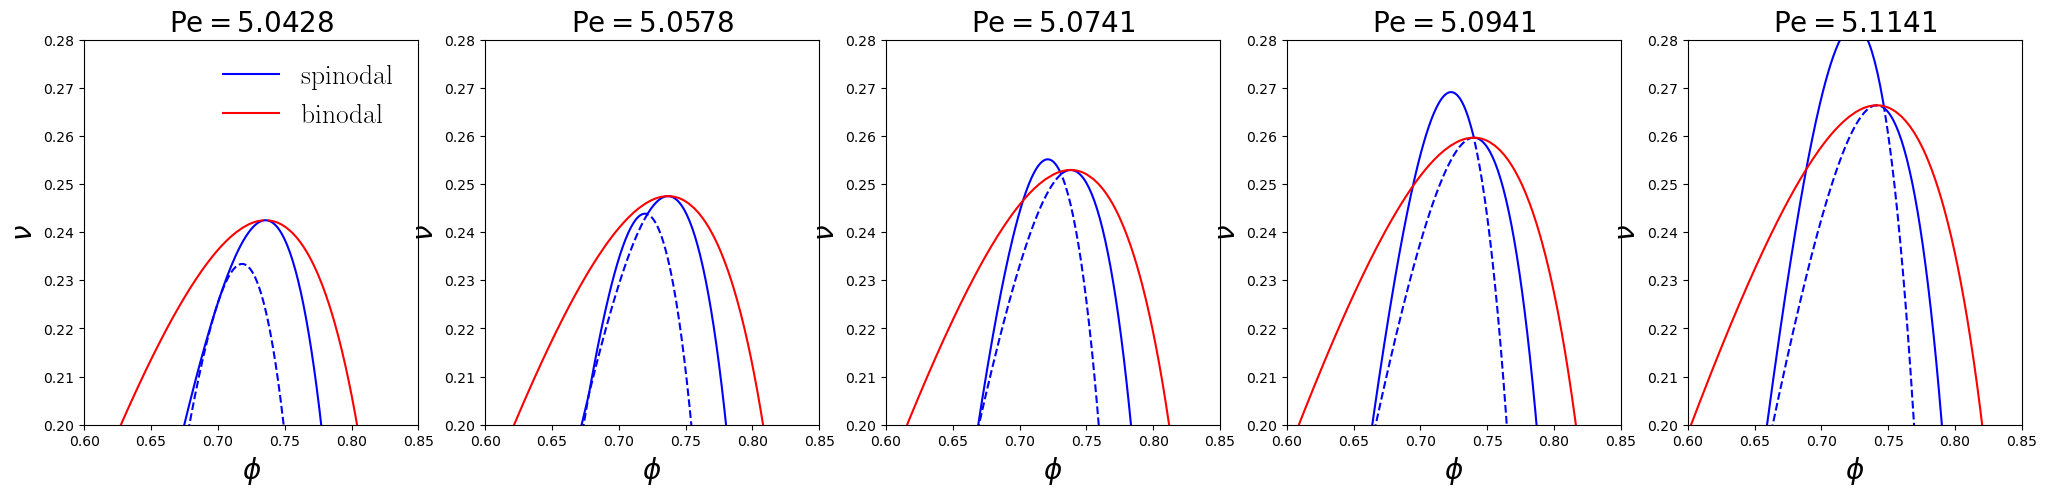

PyObject <matplotlib.legend.Legend object at 0x3232e8d10>

In [4]:
Pe1 = find_zero(reimdiff,(5.0,7.5))
Pe2 = find_zero(reimcritdiff,(5.0,7.5))
font = 20
Pes = [Pe1, Pe1+0.015, Pe2-0.02, Pe2,Pe2+0.02]

fig, axs = subplots(1,5,figsize=(25,5))
rc("text", usetex=true)

for (ax,Pe) in zip(axs,Pes)
    ϕends = [0.01,0.99]
    ϕs = collect(ϕends[1]:0.001:ϕends[2])

    ϕp1s = pspin.(ϕs;Pe=Pe)
    ϕp2s = pspin_im.(ϕs;Pe=Pe)

    ax.plot(ϕs,max.(ϕp1s./(-ϕs.+1),ϕp2s./(-ϕs.+1)); color = "blue", label = L"\mathrm{spinodal}")
    ax.plot(ϕs,min.(ϕp1s./(-ϕs.+1),ϕp2s./(-ϕs.+1)); color = "blue", linestyle = "--")

    filename = datadir("binodal/Pe=$(Pe).jld2")
    data = wload(filename)
    @unpack Pe, γs, ϕ1s, ϕ2s = data

    ax.plot(ϕ1s,γs.-1; color = "red", label = L"\mathrm{binodal}")
    ax.plot(ϕ2s,γs.-1; color = "red")

    ax.axis([0.6,0.85,0.2,0.28])

    ax.set_xlabel(L"\phi", fontsize = font)
    ax.set_ylabel(L"\nu", fontsize = font)

    latex_string = latexstring("\$ \\mathrm{Pe} = $(d4(Pe))\$")
    ax.set_title(latex_string, fontsize = font)
end

axs[1].legend(fontsize = font, edgecolor = "white")
